<a href="https://colab.research.google.com/github/NadeefChowdhury/Tensorflow_6_Sine_Wave/blob/main/Tensorflow_6_Sine_Wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(0,50,501)

In [3]:
y = np.sin(x)

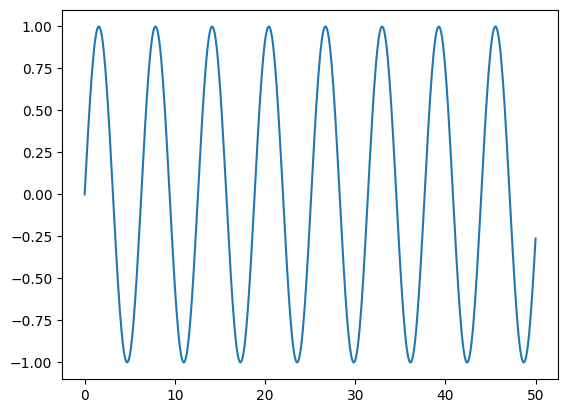

In [4]:
plt.plot(x,y)

In [5]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [6]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [7]:
test_percent = 0.1

In [8]:
test_point = np.round(len(df)*test_percent)

In [9]:
test_ind = int(len(df)-test_point)

In [10]:
train = df.iloc[:test_ind]

In [11]:
test = df.iloc[test_ind:]

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(train)

MinMaxScaler()

In [15]:
scaled_train = scaler.transform(train)

In [16]:
scaled_test = scaler.transform(test)

In [17]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

<Axes: >

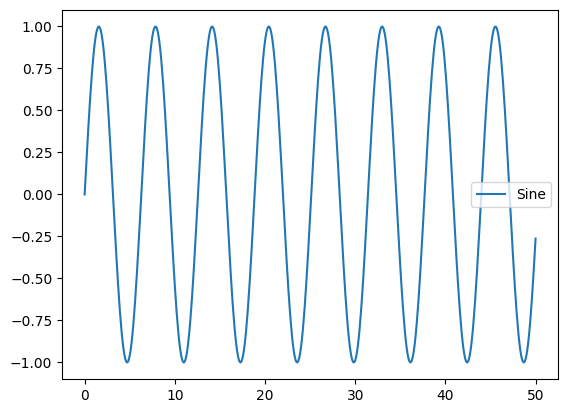

In [18]:
df.plot()

In [19]:
length = 50

In [20]:
batch_size=1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [21]:
generator[0]

(array([[[4.99999116e-01],
         [5.49916225e-01],
         [5.99334579e-01],
         [6.47760405e-01],
         [6.94709850e-01],
         [7.39713809e-01],
         [7.82322618e-01],
         [8.22110545e-01],
         [8.58680040e-01],
         [8.91665714e-01],
         [9.20737985e-01],
         [9.45606372e-01],
         [9.66022399e-01],
         [9.81782075e-01],
         [9.92727935e-01],
         [9.98750612e-01],
         [9.99789928e-01],
         [9.95835500e-01],
         [9.86926839e-01],
         [9.73152957e-01],
         [9.54651478e-01],
         [9.31607263e-01],
         [9.04250562e-01],
         [8.72854714e-01],
         [8.37733417e-01],
         [7.99237589e-01],
         [7.57751870e-01],
         [7.13690771e-01],
         [6.67494535e-01],
         [6.19624741e-01],
         [5.70559686e-01],
         [5.20789614e-01],
         [4.70811810e-01],
         [4.21125636e-01],
         [3.72227539e-01],
         [3.24606094e-01],
         [2.78737119e-01],
 

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [23]:
n_features = 1

In [24]:
model = Sequential()
model.add(SimpleRNN(50, input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [25]:
model.fit_generator(generator, epochs=5)

Epoch 1/5


<ipython-input-25-20ed1eb3145d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=5)


401/401 [==============================] - 7s 12ms/step - loss: 0.0111
Epoch 2/5
401/401 [==============================] - 4s 9ms/step - loss: 4.7569e-05
Epoch 3/5
401/401 [==============================] - 4s 11ms/step - loss: 1.1170e-04
Epoch 4/5
401/401 [==============================] - 4s 10ms/step - loss: 7.7984e-04
Epoch 5/5
401/401 [==============================] - 4s 9ms/step - loss: 3.7145e-04


In [26]:
losses = pd.DataFrame(model.history.history)

<Axes: >

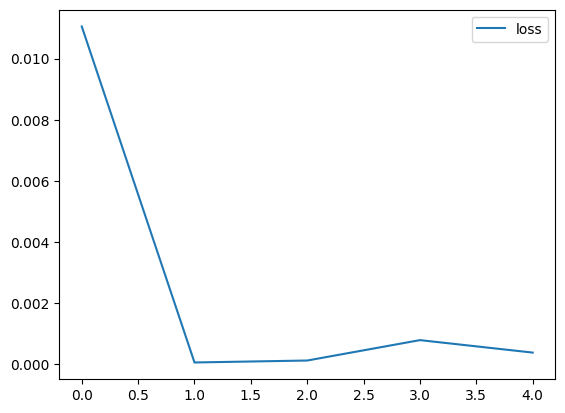

In [27]:
losses.plot()

In [28]:
first_eval_batch = scaled_train[-length:]

In [29]:
first_eval_batch = first_eval_batch.reshape(1, length, n_features)

In [30]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 221ms/step


array([[0.946414]], dtype=float32)

In [31]:
scaled_test[0]

array([0.94955134])

In [32]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)

In [33]:
np.append(current_batch[:,1:,:], [[[99]]], axis=1)

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

In [34]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)
for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 [==============================] - 0s 37ms/step


In [35]:
test_predictions

[array([0.946414], dtype=float32),
 array([0.96651334], dtype=float32),
 array([0.9797051], dtype=float32),
 array([0.9896041], dtype=float32),
 array([0.99283326], dtype=float32),
 array([0.9921863], dtype=float32),
 array([0.98689365], dtype=float32),
 array([0.97652733], dtype=float32),
 array([0.9616314], dtype=float32),
 array([0.94191664], dtype=float32),
 array([0.919328], dtype=float32),
 array([0.891327], dtype=float32),
 array([0.8606143], dtype=float32),
 array([0.8254581], dtype=float32),
 array([0.78822476], dtype=float32),
 array([0.74788564], dtype=float32),
 array([0.7049515], dtype=float32),
 array([0.66059184], dtype=float32),
 array([0.61383414], dtype=float32),
 array([0.56657726], dtype=float32),
 array([0.5176897], dtype=float32),
 array([0.4682802], dtype=float32),
 array([0.41902977], dtype=float32),
 array([0.3691991], dtype=float32),
 array([0.32153293], dtype=float32),
 array([0.27360547], dtype=float32),
 array([0.22927785], dtype=float32),
 array([0.1858254

In [36]:
true_predictions = scaler.inverse_transform(test_predictions)

In [37]:
test['Predictions'] = true_predictions

<ipython-input-37-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: >

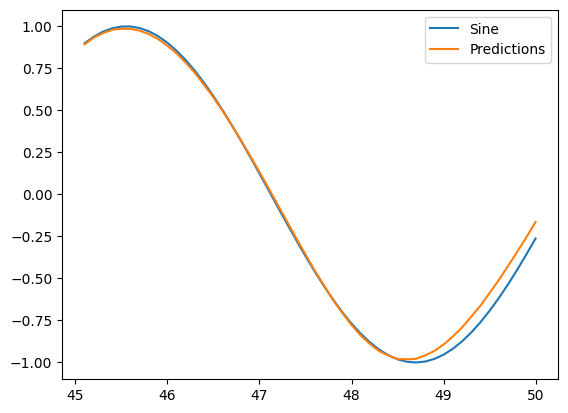

In [38]:
test.plot()

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stop = EarlyStopping(monitor='val_loss', patience = 2)
length = 49
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=batch_size)

In [41]:
model = Sequential()
model.add(LSTM(50, input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [42]:
model.fit_generator(generator, epochs=20, validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/20


<ipython-input-42-ed6295272cf4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=20, validation_data=validation_generator, callbacks=[early_stop])


402/402 [==============================] - 13s 25ms/step - loss: 0.0208 - val_loss: 1.1029e-04
Epoch 2/20
402/402 [==============================] - 8s 21ms/step - loss: 2.0927e-04 - val_loss: 3.4718e-07
Epoch 3/20
402/402 [==============================] - 9s 23ms/step - loss: 1.1900e-04 - val_loss: 1.4837e-05
Epoch 4/20
402/402 [==============================] - 10s 24ms/step - loss: 6.7828e-05 - val_loss: 8.1021e-06


In [43]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)
for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 [==============================] - 0s 26ms/step


In [44]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions

<ipython-input-44-62ef3e499fd5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = true_predictions


<Axes: >

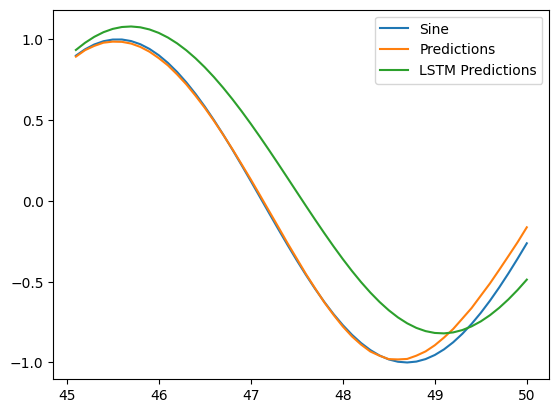

In [45]:
test.plot()

In [46]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [48]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=batch_size)

In [49]:
model = Sequential()
model.add(LSTM(50, input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [50]:
model.fit_generator(generator, epochs=5, validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/5


<ipython-input-50-f8fb03f9cf37>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=5, validation_data=validation_generator, callbacks=[early_stop])


452/452 [==============================] - 16s 28ms/step - loss: 0.0111 - val_loss: 1.7149e-04
Epoch 2/5
452/452 [==============================] - 11s 23ms/step - loss: 1.8247e-04 - val_loss: 1.2159e-04
Epoch 3/5
452/452 [==============================] - 11s 24ms/step - loss: 2.1185e-04 - val_loss: 7.5148e-05
Epoch 4/5
452/452 [==============================] - 11s 24ms/step - loss: 7.5673e-05 - val_loss: 4.4825e-05
Epoch 5/5
452/452 [==============================] - 11s 24ms/step - loss: 7.4720e-05 - val_loss: 3.6744e-06


In [51]:
forecast = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)
for i in range(25):
  current_pred = model.predict(current_batch)[0]
  forecast.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 [==============================] - 0s 27ms/step


In [52]:
forecast = scaler.inverse_transform(forecast)

In [53]:
forecast_index = np.arange(50.1, 52.6, step=0.1)

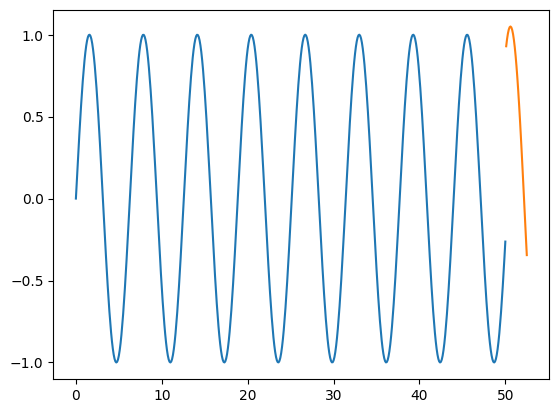

In [54]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index, forecast)